# Сборный проект : " Выявление успешности рынка продаж компьютерных игр "

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

 В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Инструкция по выполнению проекта
        
* Шаг 1. Откройте файл с данными и изучите общую информацию


* Шаг 2. Подготовьте данные

Замените названия столбцов (приведите к нижнему регистру);

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

Опишите причины, которые могли привести к пропускам;

Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

* Шаг 3. Проведите исследовательский анализ данных
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


* Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?


* Шаг 5. Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.

Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

* Шаг 6. Напишите общий вывод

# Описание данных

* Name — название игры

* Platform — платформа

* Year_of_Release — год выпуска

* Genre — жанр игры

* NA_sales — продажи в Северной Америке (миллионы проданных копий)

* EU_sales — продажи в Европе (миллионы проданных копий)

* JP_sales — продажи в Японии (миллионы проданных копий)

* Other_sales — продажи в других странах (миллионы проданных копий)

* Critic_Score — оценка критиков (максимум 100)

* User_Score — оценка пользователей (максимум 10)

* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/Users/Амина/Downloads/games.csv', sep=",")
except:    
    df = pd.read_csv('/datasets/games.csv', sep=",")

In [3]:
display(df.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [5]:
df.duplicated().sum()

0

In [6]:
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


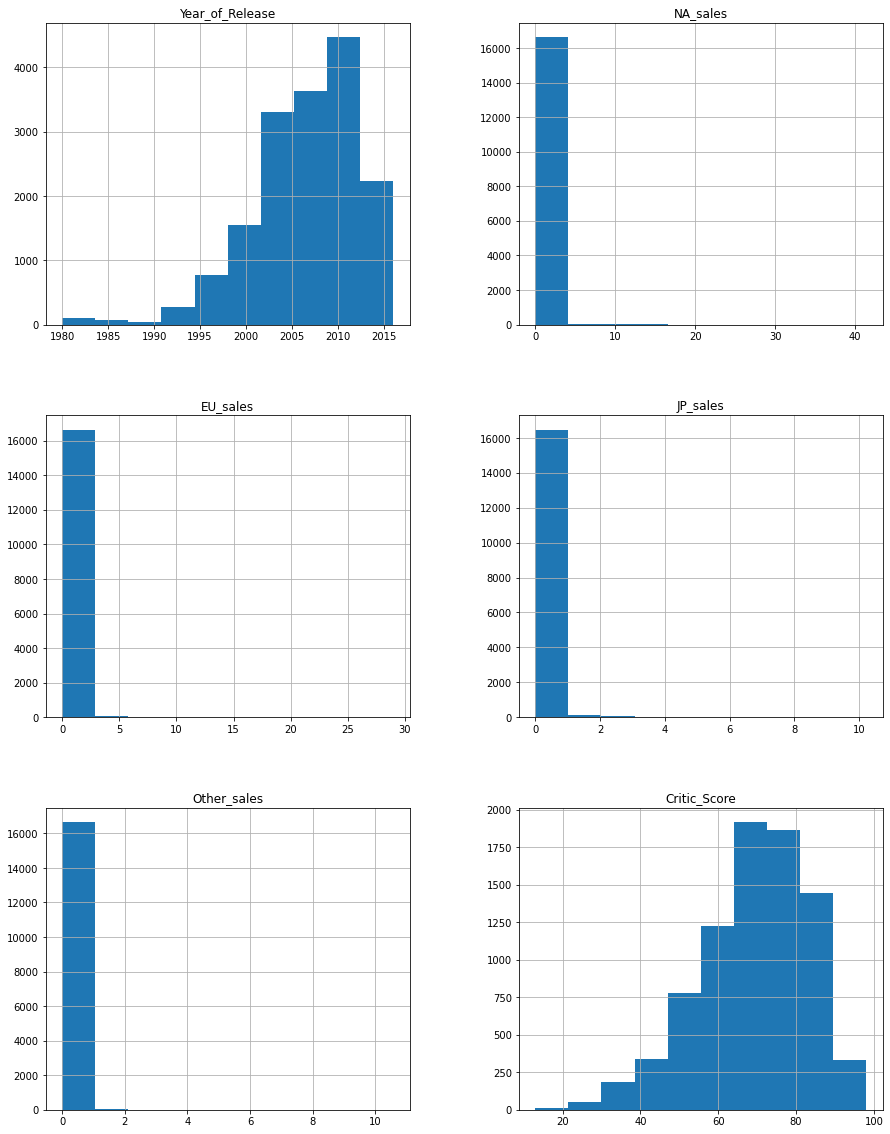

In [7]:
df.hist(figsize=(15,20));

Файл содержит информацию о 16715 играх. Согласно документации к данным:

* Name — название игры

* Platform — платформа

* Year_of_Release — год выпуска

* Genre — жанр игры

* NA_sales — продажи в Северной Америке (миллионы проданных копий)

* EU_sales — продажи в Европе (миллионы проданных копий)

* JP_sales — продажи в Японии (миллионы проданных копий)

* Other_sales — продажи в других странах (миллионы проданных копий)

* Critic_Score — оценка критиков (максимум 100)

* User_Score — оценка пользователей (максимум 10)

* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Подготовьте данные

In [8]:
# Заменим названия столбцов (приведем к нижнему регистру)

df.columns = map(str.lower, df.columns)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Преобразуем данные в нужные типы.Обработаем пропуски при необходимости

In [10]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [12]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [13]:
df['year_of_release'].dtype

Int64Dtype()

Поменяли в столбце year_of_release тип на Int64, так как год пишут всегда целым числом.

* Посмотрим столбец name

In [14]:
# Посмотрим пропущенные значения

df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
df.query('platform=="GEN" and year_of_release==1993')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Нет возможности узнать имя игр, к тому же, и в других столбцах тоже есть пропуски , поэтому удалим эти 2 строки, так как 2 строки против почти 15тыс., незначительно мало

In [16]:
print('До удаления',len(df))
df.dropna(subset=['name'], inplace=True)
df.reset_index(inplace=True,drop=True)
print('После удаления',len(df))

До удаления 16715
После удаления 16713


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [18]:
df.isnull().sum() * 100 / len(df)

name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         40.082570
rating             40.471489
dtype: float64

Попробуем проверить, чтобы найти одни и теже имена , которые написаны по разному.

In [19]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [20]:
df.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


* Посмотрим столбец platform. Пропусков здесь нет, проверим корректность данных.

In [21]:
df['platform'].value_counts().sort_index()

2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: platform, dtype: int64

С платформами всё в порядке столбец корректен.

* Посмотрим столбец year_of_release

In [22]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

С данными всё нормально, разберемся с пропусками.

In [23]:
display(df[df['year_of_release'].isna()])
print('Кол-во пропусков =', df['year_of_release'].isna().sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Кол-во пропусков = 269


In [24]:
print('Доля пропусков = ', df['year_of_release'].isna().mean() * 100)

Доля пропусков =  1.6095255190570215


In [25]:
df.dropna(subset = ['year_of_release'], inplace=True)

В столбце year_of_release доля пропусков 1.6 % - это сравнительно мало для дальнейшей обработки, поэтому удалим их.

* Посмотрим столбец genre

In [26]:
df['genre'].value_counts().sort_index()

Action          3307
Adventure       1293
Fighting         837
Misc            1721
Platform         878
Puzzle           569
Racing          1226
Role-Playing    1481
Shooter         1296
Simulation       857
Sports          2306
Strategy         673
Name: genre, dtype: int64

Пропусков нет, имена жанров в порядке, всё корректно.

* Посмотрим столбец na_sales

In [27]:
df['na_sales'].describe()

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Всё корректно.

* Посмотрим столбец eu_sales

In [28]:
df['eu_sales'].describe()

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

Всё корректно.

* Посмотрим столбец jp_sales

In [29]:
df['jp_sales'].describe()

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

Всё корректно.

* Посмотрим столбец other_sales

In [30]:
df['other_sales'].describe()

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

Всё корректно.

* Посмотрим столбцы critic_score и user_score

Обработаем пропуски в этих двух столбцах по одному алгоритму - в зависимости от продаж: чем больше продажи, тем больше рейтинг.

In [31]:
display(df['critic_score'].describe())
display(df['critic_score'].value_counts())

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64

Данные столбца critic_score корректны.

In [32]:
# Рассмотрим столбец user_score

display(df[['user_score']].describe())

,user_score
count,9839
unique,96
top,tbd
freq,2376


In [33]:
display(df['user_score'].value_counts())

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.3       2
9.6       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

TBD — расшифровывается очень просто - To Be Determined, то есть "Подлежит определению".

Данная аббревиатура затрагивает две IT-сферы: видеоигры и модель разработки программного обеспечения. 

TBD — это Trunk Based Development или магистральная разработка программного обеспечения. Это специальный метод разработки, при котором программисты совместно работают над одной веткой кода, которая называется «ствол» (или главная ветка). Остальные ответвления разработки имеют более короткий срок жизни благодаря использованию документированных моделей.
* Выведем на экран строки с "tbd"

In [34]:
display(df[df['user_score']=="tbd"])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
717,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16693,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16695,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16696,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16702,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [35]:
#Заменим "tbd" на Nan

print("В 'user_score' Nan было =", df['user_score'].isna().sum())
df.loc[df['user_score']=="tbd", 'user_score']=np.nan

В 'user_score' Nan было = 6605


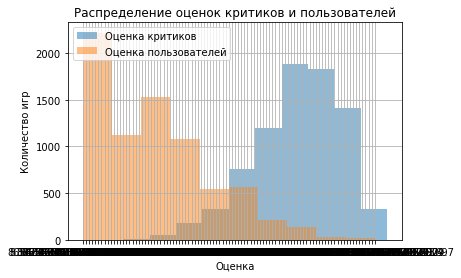

In [36]:
# Посмотрим график оценок

fig, ax = plt.subplots()
df.critic_score.hist(ax=ax, label='Оценка критиков',alpha=0.5)
(df.user_score*10).hist(ax=ax, label='Оценка пользователей', alpha=0.5)
ax.legend(loc='upper left')
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество игр')
ax.set_title('Распределение оценок критиков и пользователей')
plt.alpha=0.5
plt.show()

Оценки довольно разнятся, заменим тип данных

In [37]:
#Заменим тип данных "tbd"

df['user_score'] = df['user_score'].astype(float)

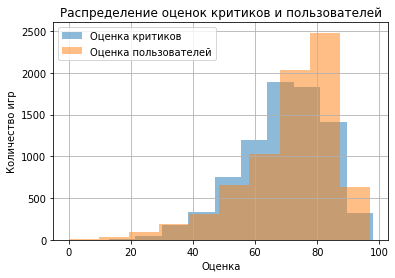

In [38]:
fig, ax = plt.subplots()
df.critic_score.hist(ax=ax, label='Оценка критиков',alpha=0.5)
(df.user_score*10).hist(ax=ax, label='Оценка пользователей', alpha=0.5)
ax.legend(loc='upper left')
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество игр')
ax.set_title('Распределение оценок критиков и пользователей')
plt.alpha=0.5
plt.show()

В общем и целом, оценки сопадают. При это заметно, что разброс оценок у пользователей шире.

In [39]:
print('Доля пропусков = ', df['critic_score'].isna().mean() * 100)
print('Доля пропусков = ', df['user_score'].isna().mean() * 100)
print('Кол-во пропусков =', df['critic_score'].isna().sum())
print('Кол-во пропусков =', df['user_score'].isna().sum())

Доля пропусков =  51.453417659936754
Доля пропусков =  54.61566528825104
Кол-во пропусков = 8461
Кол-во пропусков = 8981


В столбцах critic_score и user_score проведена обработка данных.

In [40]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

* Посмотрим столбец rating

In [41]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [42]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Entertainment Software Rating Board (ESRB) - Негосударственная организация, основное направление деятельности - принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association. К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей. 

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. 

«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. 

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. 

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры. 

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. 

«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». 


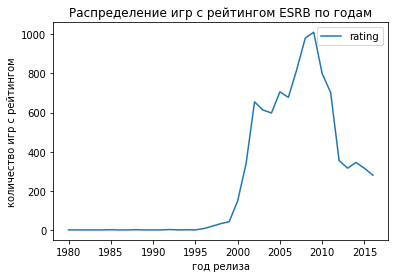

In [43]:
plots = df.groupby('year_of_release')['rating'].count().reset_index().plot(x='year_of_release')
plt.xlabel('год релиза')
plt.ylabel('количество игр с рейтингом')
plt.title('Распределение игр с рейтингом ESRB по годам')
plt.show()

Пропусков в столбце rating - 6676, довольно много. Но с учетом того, что ESRB была основана в 1994 году, а выгрузке присутствуют игры с 1980 года, скорее всего эти игры не получили оценок, поскольку могли быть выпущены до того, как появилась система ESRB или их не успели оценить. На графике видно количество игр, которым был присвоен рейтинг увеличиваетя после 1995 г. Поэтому пропуски заполним особым значением "unknown", чтобы при составлении портрета пользователя не потерять данные.

In [44]:
df['rating'] = df['rating'].fillna('unknown')

In [45]:
df.duplicated().sum()

0

In [46]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

* Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [47]:
df['sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24



В ходе предобработки преобразовали данные в нужные типы. Обработали необходимые пропуски.

Поменяли в столбце year_of_release тип на Int64, так как год пишут всегда целым числом.

В столбце year_of_release доля пропусков 1.6 % - это сравнительно мало для дальнейшей обработки, поэтому удалим их.

Пропусков в столбце rating - 6676, довольно много. Но с учетом того, что ESRB была основана в 1994 году, а выгрузке присутствуют игры с 1980 года, скорее всего эти игры не получили оценок, поскольку могли быть выпущены до того, как появилась система ESRB или их не успели оценить. На графике видно количество игр, которым был присвоен рейтинг увеличиваетя после 1995
года. 

Поэтому пропуски заполним особым значением "unknown", чтобы при составлении портрета пользователя не потерять данные.
Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.


## Проведём исследовательский анализ данных

* Посмотрим, сколько игр выпускалось в разные годы.

In [48]:
time_release = df.groupby('year_of_release')['name'].count().reset_index()
time_release.columns = ['year', 'quantity']
time_release

,year,quantity
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


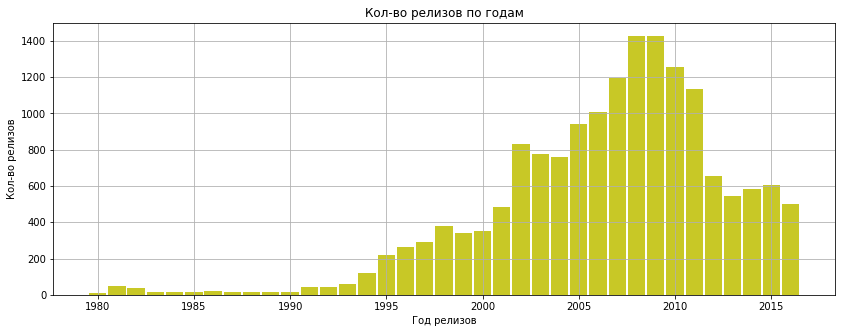

In [49]:
plt.figure(figsize=(14, 5))
plt.bar(time_release['year'], time_release['quantity'], label='Кол-во релизов за год', color='y', alpha=0.85, width=0.9)
plt.xlabel('Год релизов')
plt.ylabel('Кол-во релизов')
plt.grid()
plt.title(f'Кол-во релизов по годам')
plt.show();

Период до 1994 года характеризуется не большой активностью. Хорошо видно, что важный период в релизах игр наступает в 1994 году - и после него начинается активный рост - компьютерные игры вырастают в аудитории. В 2010 наступает пиковый момент, и уже в 2012 релизы падают в 2 раза и до 2016 держатся примерно на одном уровне.

In [50]:
games_years = df.pivot_table(index = 'platform', 
                                columns = 'year_of_release', 
                                values = 'name', 
                                aggfunc='count',
                                fill_value=0,
                                margins=True
                               ).reset_index()
                               
pd.set_option('display.max_columns', None)
games_years

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
0,2600,9,46,36,11,1,1,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116
1,3DO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3DS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,93,91,80,86,46,512
3,DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,14,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,52
4,DS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,118,201,376,492,403,323,153,23,8,0,0,0,2121
5,GB,0,0,0,0,0,0,0,0,1,10,3,9,7,0,3,4,6,8,8,11,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97
6,GBA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,107,198,150,175,135,39,6,0,0,0,0,0,0,0,0,0,811
7,GC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,152,144,83,97,40,4,0,0,0,0,0,0,0,0,0,542
8,GEN,0,0,0,0,0,0,0,0,0,0,1,1,6,7,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27
9,GG,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


У платформы All наблюдается явное преимущество в разные года по кол-ву игр.

* Посмотрим анализ продаж по платформам

In [51]:
plf = df.groupby('platform')['sales'].sum().sort_values().reset_index()
plf

,platform,sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


Возьмем примерно 10 платформ с наибольшими объемами продаж. Построим по ним распределение продаж по годам.

In [52]:
popul_platforms = plf.loc[17:30, 'platform'].values
popul_platforms

array(['NES', 'XB', 'GB', 'PC', '3DS', 'PSP', 'GBA', 'PS4', 'PS', 'DS',
       'Wii', 'PS3', 'X360', 'PS2'], dtype=object)

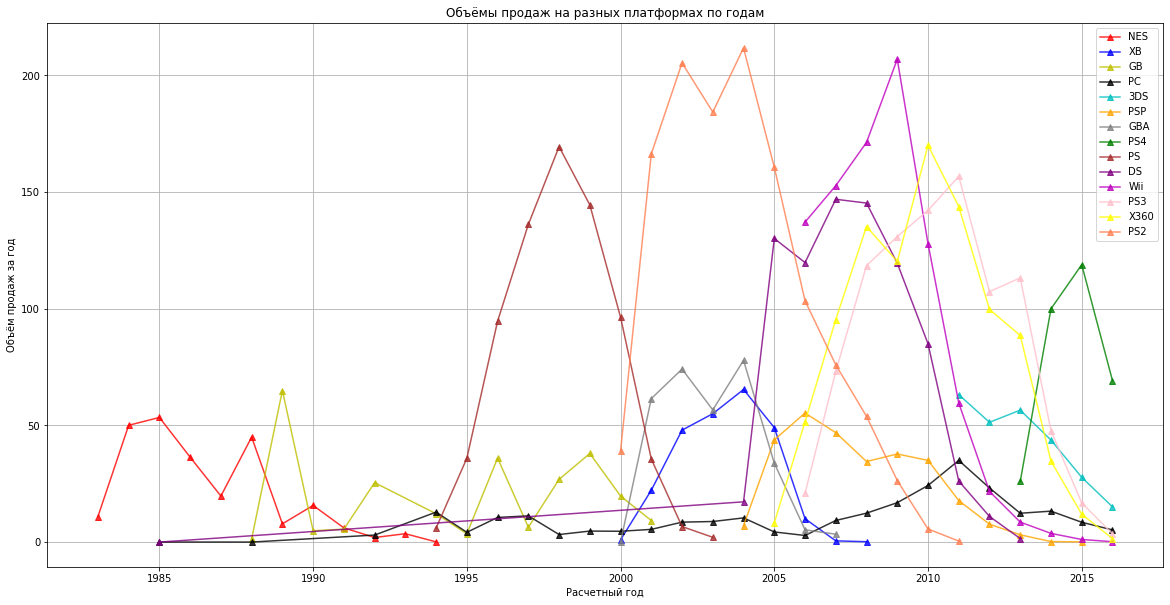

In [53]:
color = ['r','b','y','black','c','orange','grey','green','brown','purple','m','pink','yellow','coral','darkcyan','dimgray','lime']

plt.figure(figsize=(20, 10))
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам')

mean_year_life = 0
for i in range(0,len(popul_platforms)):
    platform  = df.query('platform == @popul_platforms[@i]').groupby('year_of_release')['sales'].sum()
    mean_year_life += platform.count()
    platform.plot(x=platform.index, y=platform.values, style='-^', color=color[i], \
                  label=popul_platforms[i], alpha=0.8, grid=True);
plt.xlabel('Расчетный год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show();

In [54]:
# Подсчитаем срок жизни платформы

mean_year_life/len(popul_platforms)

11.214285714285714

Расчетное значение 11,2 года, а из графика видно, что срок активного существования платформ 9-10 лет(если не обращать внимания на минимальные значения по краям), и распределение продаж идет близко к нормальному распределению. Поэтому будем считать, что срок средний существования платформы - 10-12 лет. Можно выделить из списка платформ -"DS" просуществовала очень долго - до 2013 года. Топ по выручке - отметим "PS2" и "Wii". Так же отслеживается топ объем продаж с ростом за год у платформ "PS", "X360", "PS3", "PS4". Остальные платформы по объему продаж, не более 100.

* Прогноз на 2017 год

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [55]:
# Как мы видели ранее, срок существования платформ примерно 10-12 лет,
# поэтому для прогноза на 2017 год возьмем предыдущий период в 11 лет (с 2005 года)

platform2017 = df.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum').\
    query('year_of_release>2004').fillna(0).reset_index()
platform2017['year_of_release'] = platform2017['year_of_release'].astype('Int64')

for column in platform2017.columns:
    if platform2017[column].sum()==0:
        platform2017.drop(column, axis=1,inplace=True)

display(platform2017)


platform,year_of_release,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
0,2005,0.00,0.00,130.14,33.86,27.62,4.37,160.66,0.00,0.00,43.84,0.00,0.00,0.00,8.25,49.08,0.00
1,2006,0.00,0.00,119.81,5.28,11.26,2.85,103.42,20.96,0.00,55.32,0.00,137.15,0.00,51.62,10.04,0.00
2,2007,0.00,0.02,146.94,3.40,0.27,9.28,75.99,73.19,0.00,46.93,0.00,152.77,0.00,95.41,0.55,0.00
3,2008,0.00,0.04,145.31,0.00,0.00,12.42,53.90,118.52,0.00,34.55,0.00,171.32,0.00,135.26,0.18,0.00
4,2009,0.00,0.00,119.54,0.00,0.00,16.91,26.40,130.93,0.00,37.78,0.00,206.97,0.00,120.29,0.00,0.00
5,2010,0.00,0.00,85.02,0.00,0.00,24.28,5.64,142.17,0.00,35.04,0.00,127.95,0.00,170.03,0.00,0.00
6,2011,63.20,0.00,26.18,0.00,0.00,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00,0.00
7,2012,51.36,0.00,11.01,0.00,0.00,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00,0.00
8,2013,56.57,0.00,1.54,0.00,0.00,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,0.00,18.96
9,2014,43.76,0.00,0.00,0.00,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,0.00,54.07


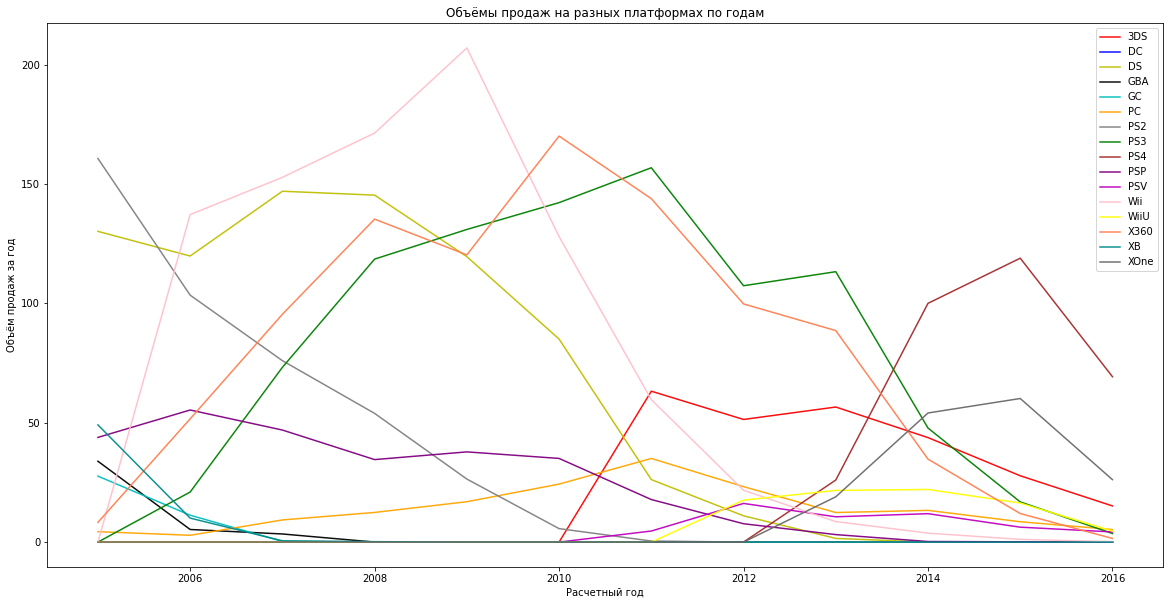

In [56]:
plt.figure(figsize=(20, 10))
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам')

i=0
for column in platform2017.columns[1:]:
    plt.plot(platform2017['year_of_release'].to_list(), platform2017[column].to_list(), label=column, color=color[i], alpha=0.95);
    i+=1 

plt.grid()
plt.xlabel('Расчетный год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show();

Из графика видно, что многие популярные платформы, такие как: Wii, PS3, X360, PSP, - прошли свой цикл развития 10-12 лет, и как раз в районе текущего 2016 года завершающий этап (другие платформы PS2, DS, GBA, XB, закончились еще раньше) - во все эти платформы вкладываться не стоит их развитие закончилось. Но есть две платформы PS4 и XOne, которые появились относительно недавно в 2012 году и уже завоевали потребителя в 2014 и 2015 рост, а в 2016 был спад; их жизненный цикл ещё не дошёл даже до середины, поэтому будет логично воспользоваться спадом и развивать их, на данный момент самые многообещающие платформы. Еще есть другие 3 платформы, которые появились пораньше PSV (слабое развитие) в 2010, WiiU в 2011, 3DS в 2010 и на данные момент на середине своего цикла развития, поэтому вложения в эти платформы должны быть умеренными. Также надо обратить внимание платформу PC, которая существуют уже очень долго и стабильно, она актуальна во все времена (но в небольших объёмах продаж). Платформы - PS4 и XOne, PSV, WiiU и 3DS - тоже можно продолжать развивать, но в меньших объемах (PSV - развитие идет слабо, поэтому приоритет у WiiU и 3DS); платформа PC - актуальна всегда (но тоже в малых объемах), поэтому надо поддерживать её развитие.

In [57]:
#Как мы выяснили ранее, средний срок жизни платформ прримерно 11 лет, поэтому для прогноза на 2017 год
#возьмем предыдущий период в 11 лет (с 2006 года)

df.query('year_of_release > 2005').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='.')

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
3DS,.,.,.,.,.,116.0,93.0,91.0,80.0,86.0,46.0
DC,.,1.0,1.0,.,.,.,.,.,.,.,.
DS,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,.,.,.
GBA,39.0,6.0,.,.,.,.,.,.,.,.,.
GC,40.0,4.0,.,.,.,.,.,.,.,.,.
PC,52.0,62.0,76.0,107.0,90.0,139.0,61.0,38.0,47.0,50.0,54.0
PS2,259.0,214.0,191.0,96.0,38.0,7.0,.,.,.,.,.
PS3,27.0,90.0,138.0,162.0,181.0,215.0,148.0,126.0,108.0,73.0,38.0
PS4,.,.,.,.,.,.,.,16.0,75.0,137.0,164.0


По распределению можно заметить, что примерно в 2006 году рынок платформ меняется и на замену старым приходят новые.
Поэтому можно сократить актуальный период до 6 лет (2011 - 2016).

In [58]:
df_years = df[df['year_of_release'] >= 2011]
df_years.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='.')

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,116.0,93.0,91.0,80.0,86.0,46.0
DS,153.0,23.0,8.0,.,.,.
PC,139.0,61.0,38.0,47.0,50.0,54.0
PS2,7.0,.,.,.,.,.
PS3,215.0,148.0,126.0,108.0,73.0,38.0
PS4,.,.,16.0,75.0,137.0,164.0
PSP,139.0,106.0,54.0,10.0,3.0,.
PSV,18.0,53.0,63.0,100.0,110.0,85.0
Wii,143.0,31.0,12.0,6.0,4.0,1.0


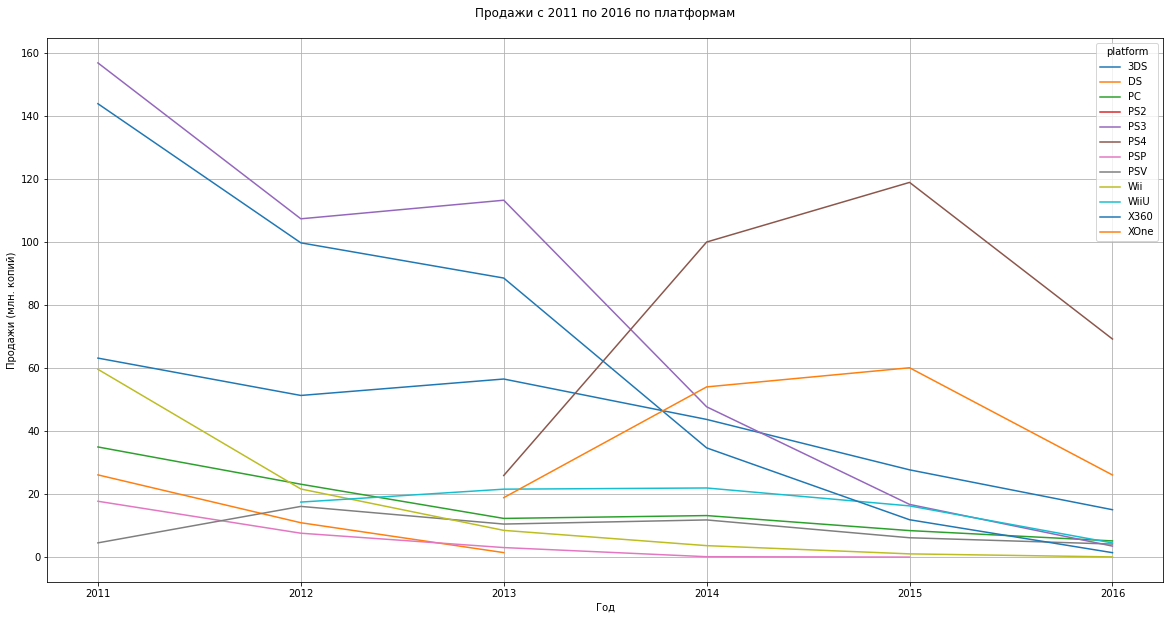

In [59]:
pd.pivot_table(df_years, index='year_of_release', columns='platform', values='sales', aggfunc='sum').plot(figsize=(20,10))
plt.grid(True)
plt.title('Продажи с 2011 по 2016 по платформам\n  ')
plt.xlabel('Год')
plt.ylabel('Продажи (млн. копий)')
plt.show()

На графике, все платформы теряют в продажах.
По условиям, данные по 2016 году могут быть неполными, а значит ориентироваться на него не стоит.
Шанс улучшить показатели продаж есть у PS4, PC, PSV, XOne и WiiU.
Наилучшие перспективы у платформ PS4 и XOne.

* Создадим топ-5 платформ с наибольшими суммарными продажами.

In [60]:
top5_platform_name = ['PS4', '3DS', 'XOne', 'WiiU', 'PSV']
top5_platform = df_years.query('platform in @top5_platform_name').groupby('platform')['sales'].sum().sort_values(ascending=False).reset_index()
top5_platform

,platform,sales
0,PS4,314.14
1,3DS,257.81
2,XOne,159.32
3,WiiU,82.19
4,PSV,53.81


Создали топ-5 анализируя график по актуальному периоду.

* Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

(0.0, 1.25)

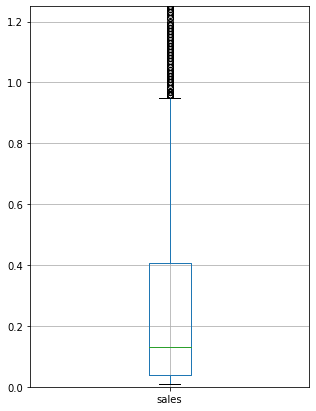

In [61]:
df_years.boxplot('sales', figsize=(5,7))
plt.ylim(0,1.25)

In [62]:
df_years['sales'].describe()

count    4022.000000
mean        0.485855
std         1.219503
min         0.010000
25%         0.040000
50%         0.130000
75%         0.407500
max        21.050000
Name: sales, dtype: float64

In [63]:
df_actual_years = df_years.query('platform in @top5_platform_name')

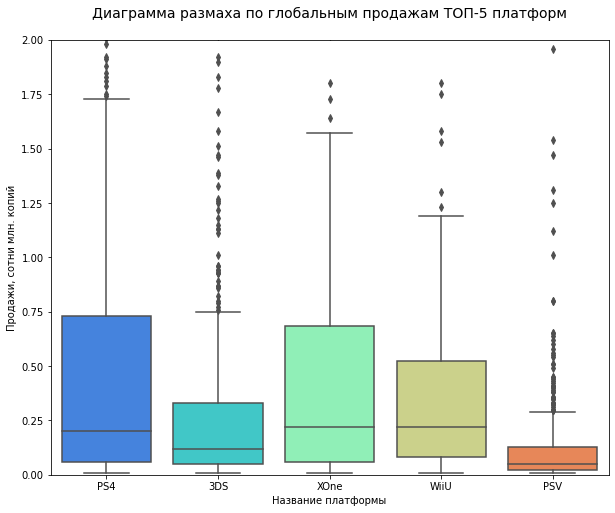

In [64]:
plt.figure(figsize=(10, 8))
plt.ylim(0, 2)
sns.boxplot(x="platform", y="sales", data = df_actual_years , palette='rainbow')
plt.title('Диаграмма размаха по глобальным продажам ТОП-5 платформ\n  ', fontsize=14)
plt.ylabel('Продажи, сотни млн. копий')
plt.xlabel('Название платформы');

In [65]:
df_actual_years_5 = df_actual_years.pivot_table(index='platform', columns='year_of_release', values='sales', aggfunc='sum', fill_value='.')
df_actual_years_5['all_years'] = df_actual_years_5.sum(axis=1)
df_actual_years_5

year_of_release,2011,2012,2013,2014,2015,2016,all_years
platform,,,,,,,
3DS,63.2,51.36,56.57,43.76,27.78,15.14,143.25
PS4,.,.,25.99,100.00,118.90,69.25,314.14
PSV,4.63,16.19,10.59,11.90,6.25,4.25,32.99
WiiU,.,17.56,21.65,22.03,16.35,4.60,64.63
XOne,.,.,18.96,54.07,60.14,26.15,159.32


За последние 6 лет наибольший объем продажа у платформ: PS4, XOne и 3DS. Но продажи платформа 3DS за счёт более ранних продаж, тогда как сейчас наблюдается стабильное падение. Высокие медиальные значения у PS4, XOne и WiiU, хотя WiiU сильно меньше в объемах продаж.
Так как продажи указаны в млн. копий, а не в денежном выражении, то есть вероятность, что платформа WiiU тоже может быть перспективной.

* Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [66]:
# Отфильтруем данные по платформе PS4 т.к. самая продаваемая

filtered_PS4 = df_years.query('platform == "PS4"')
filtered_PS4 = filtered_PS4[['critic_score', 'user_score', 'sales']]
filtered_PS4.head()

,critic_score,user_score,sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66


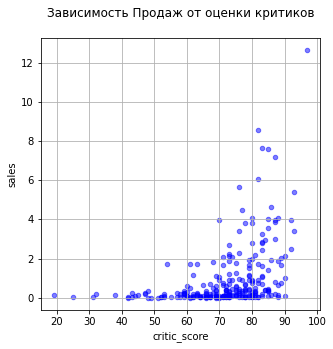

In [67]:
# Построим диаграмму рассеяния критиков

filtered_PS4.plot(kind='scatter', x='critic_score', y='sales', figsize=(5,5), color='blue', alpha=0.5, grid=True)
plt.title('Зависимость Продаж от оценки критиков\n  ');

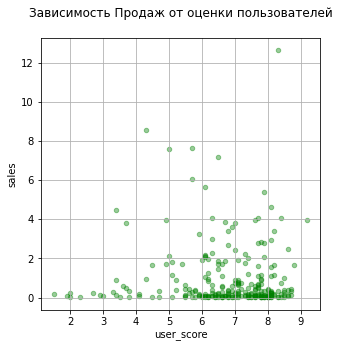

In [68]:
# Построим диаграмму рассеяния пользователей

filtered_PS4.plot(kind='scatter', x='user_score', y='sales', figsize=(5,5), color='g', alpha=0.4, grid=True)
plt.title('Зависимость Продаж от оценки пользователей\n  ');

Анализируя графики по платформе PS4, можно сказать, что оценки критиков и пользователей не оказывают слишком большого влияние на продажи игр.

In [69]:
#Рассчитаем корреляцию

filtered_PS4.corr().round(2)

,critic_score,user_score,sales
critic_score,1.00,0.56,0.41
user_score,0.56,1.00,-0.03
sales,0.41,-0.03,1.00


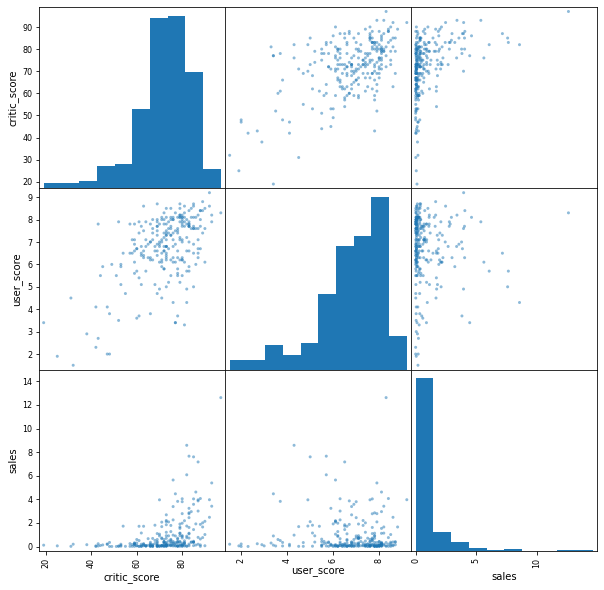

In [70]:
pd.plotting.scatter_matrix(filtered_PS4, figsize=(10,10), alpha=0.5)
plt.ticklabel_format(useOffset=False)

Есть положительная средняя корреляция между оценкой критиков и пользователей.
Критики могут учитывать мнение пользоватлей в своих оценках и наоборот.

Рассчитаем корреляцию для других платформ

In [71]:
df_years.query('platform == "3DS"')[['critic_score', 'user_score', 'sales']].corr().round(2)

,critic_score,user_score,sales
critic_score,1.00,0.75,0.35
user_score,0.75,1.00,0.22
sales,0.35,0.22,1.00


In [72]:
df_years.query('platform == "XOne"')[['critic_score', 'user_score', 'sales']].corr().round(2)

,critic_score,user_score,sales
critic_score,1.00,0.47,0.42
user_score,0.47,1.00,-0.07
sales,0.42,-0.07,1.00


In [73]:
df_years.query('platform == "WiiU"')[['critic_score', 'user_score', 'sales']].corr().round(2)

,critic_score,user_score,sales
critic_score,1.00,0.77,0.35
user_score,0.77,1.00,0.40
sales,0.35,0.40,1.00


In [74]:
df_years.query('platform == "PSV"')[['critic_score', 'user_score', 'sales']].corr().round(2)

,critic_score,user_score,sales
critic_score,1.00,0.73,0.13
user_score,0.73,1.00,0.01
sales,0.13,0.01,1.00


,critic_score,user_score,sales
critic_score,1.00,0.58,0.35
user_score,0.58,1.00,0.05
sales,0.35,0.05,1.00


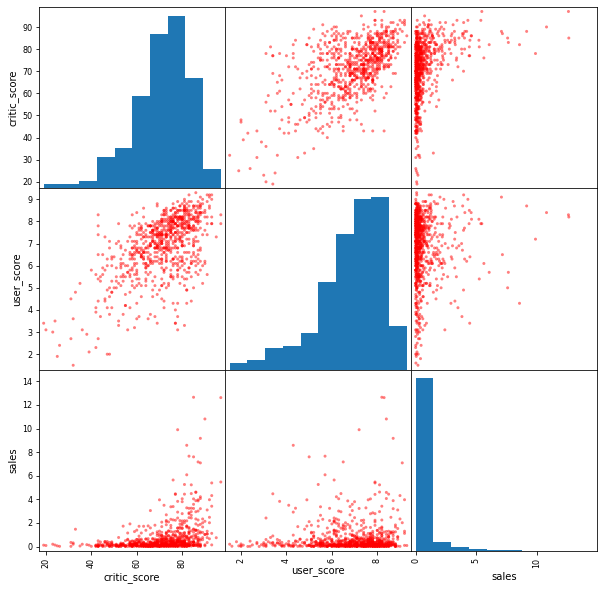

In [75]:
pd.plotting.scatter_matrix(df_actual_years[['critic_score', 'user_score', 'sales']], figsize=(10,10), color = 'red', alpha=0.5);
df_actual_years[['critic_score', 'user_score', 'sales']].corr().round(2)

Для остальных платформ мы видим более выраженную корреляцию между оценками (> 0.7), а значит существует положительная связь - чем выше оценки критиков, тем выше оценки пользователей и наоборот. Связь между оценками и количеством проданных копий положительная, но очень слабая (не более 0.42), мы не можем брать её в расчёт.

При оценки общей корреляции, можно говорить о невысокой положительной связи (0.53) оценки критиков и оценки пользователей. Корреляция между продажами и отзывами пользователей отсутствует и очень слабая с отзывами критиков.

* Посмотрим на общее распределение игр по жанрам.

In [76]:
#Общее распределение игр по жанрам

df_actual_years['genre'].value_counts()

Action          629
Role-Playing    244
Adventure       175
Sports          140
Misc            139
Shooter         100
Platform         71
Racing           63
Fighting         60
Simulation       44
Strategy         34
Puzzle           28
Name: genre, dtype: int64

In [77]:
df_actual_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16697,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [78]:
#Самые прибыльные жанры

df_genre = df_actual_years.groupby(['genre'])\
                        .agg({'sales':'sum', 'name':'count'})\
                        .rename(columns={'name':'name_count'})\

df_genre.sort_values(by = 'sales', ascending=False)

,sales,name_count
genre,,
Action,227.34,629
Shooter,160.00,100
Role-Playing,138.78,244
Sports,95.85,140
Platform,65.24,71
Racing,47.18,63
Misc,43.50,139
Fighting,30.55,60
Simulation,29.16,44


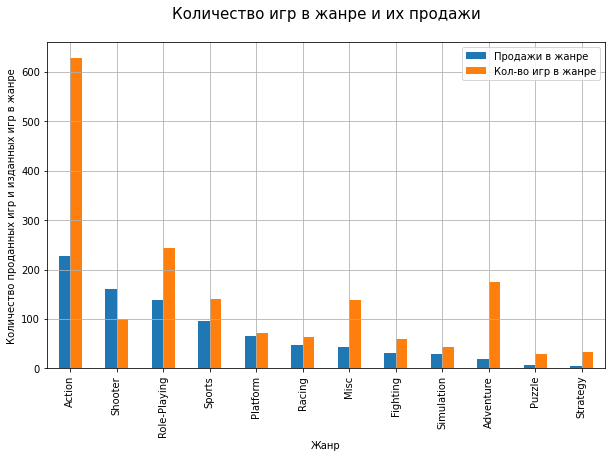

In [79]:
ag = df_genre[['sales', 'name_count']].sort_values(by = 'sales', ascending=False).plot(kind='bar', figsize=(10, 6))

plt.title('Количество игр в жанре и их продажи\n  ', fontsize=15)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр и изданных игр в жанре')
plt.legend(['Продажи в жанре', 'Кол-во игр в жанре'])
plt.grid(True)
plt.show()

Анализируя график можно сказать, что самыми продаваемыми жанрами являются: Action, Shooter, Role-Playing, Sports, Platform.
Но не можем сказть, какой из жанров прибыльнее, так как не знаем затраты на создание игры и прочие издержки. В жанре Action самое большое кол-во игр, возможно их создание обходится недорого, а объемы продаж позволяют производителям получать хорошую прибыль. Также большое кличество игр наблюдается в жанре Role-Playing и сопровождается высоким уровнем продаж.
А вот в жанре Shooter игр не так много, хотя жанр на 2 месте по объемам продаж, возможно создание игр обходится существенно дороже и прибыль становится не такой ощутимой.

Самые низкие продажи и минимальное количество игр у жанров Puzzle и Strategy.

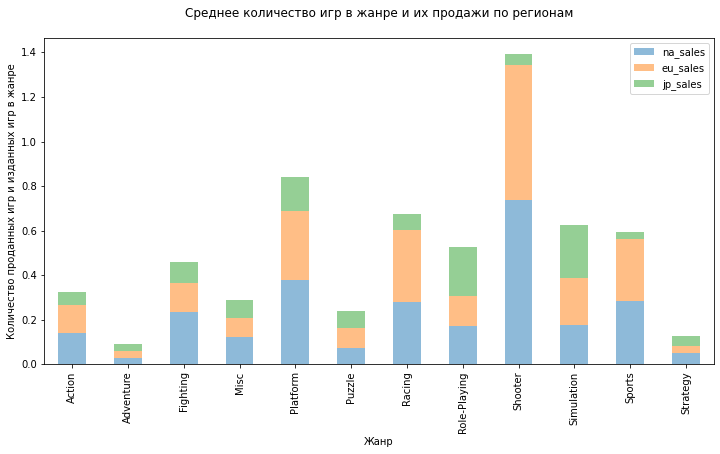

In [80]:
# Построим график для среднего количества продаж.

fig, ax = plt.subplots()

(df_actual_years
 .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
 .agg('mean')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Среднее количество игр в жанре и их продажи по регионам\n')
ax.set_ylabel('Количество проданных игр и изданных игр в жанре')
ax.set_xlabel('Жанр')
plt.show()

При анализе графика средних количеств игр в жанре и их продажи по регионам(более понятно где и как востребован жанр), можно увидеть совсем иные результаты. Можно отметить, что в Японии, особого лидера по жанрам не наблюдается, но выделим Simulation, Role-Playing, Platform. В Америке и Европе практически схожи предпочтения по жанрам. Можно отметить Shooter, Platform. Так же Racing, Sports немалые продажи.


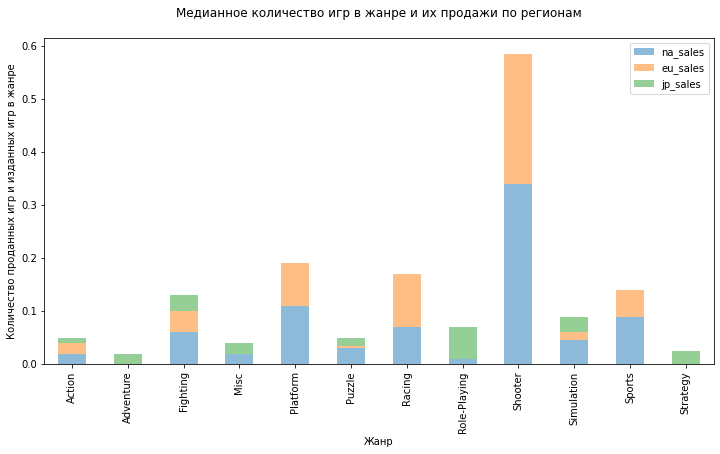

In [81]:
# Построим график для медианного количества продаж.

fig, ax = plt.subplots()

(df_actual_years
 .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
 .agg('median')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Медианное количество игр в жанре и их продажи по регионам\n')
ax.set_ylabel('Количество проданных игр и изданных игр в жанре')
ax.set_xlabel('Жанр')
plt.show()

При анализе графика медианного количества игр в жанре и их продаж по регионам, видно, что снова иные предпочтения. 
Выделим, что лидером в Америке и Европе является жанр Shooter. Неплохие продажи в жанрах Platform и Racing. В Японии, опять же четкого лидера нет, но выжелим - Role-Playing.

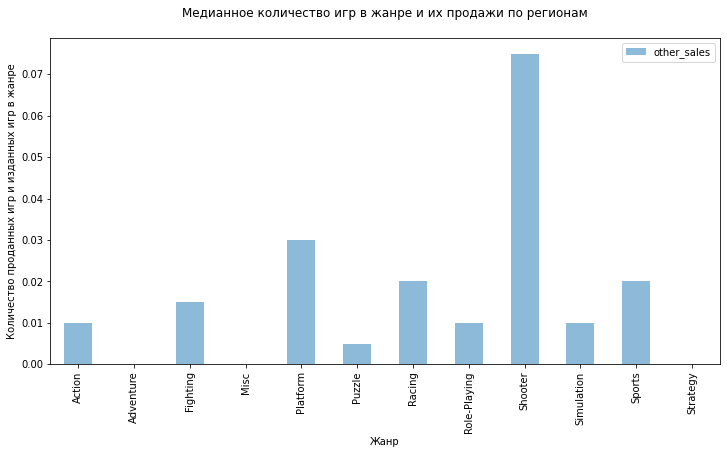

In [82]:
# Построим график для медианного количества продаж в вругих странах.

fig, ax = plt.subplots()

(df_actual_years
 .groupby('genre')[['other_sales']]
 .agg('median')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Медианное количество игр в жанре и их продажи по регионам\n')
ax.set_ylabel('Количество проданных игр и изданных игр в жанре')
ax.set_xlabel('Жанр')
plt.show()

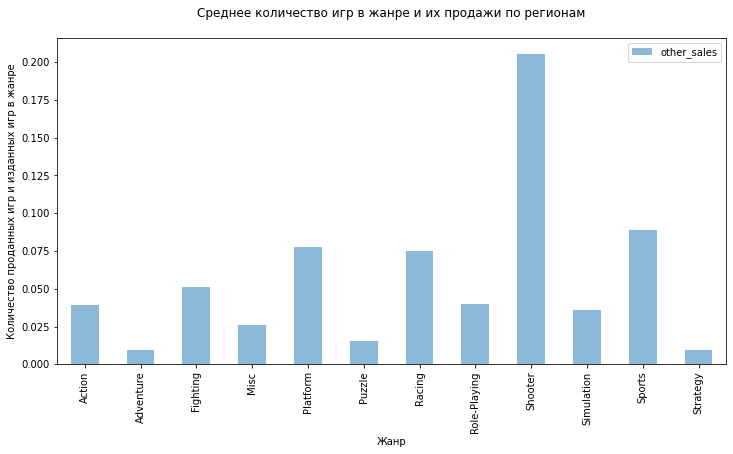

In [83]:
# Построим график для среднего количества продаж в других странах.

fig, ax = plt.subplots()

(df_actual_years
 .groupby('genre')[['other_sales']]
 .agg('mean')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Среднее количество игр в жанре и их продажи по регионам\n')
ax.set_ylabel('Количество проданных игр и изданных игр в жанре')
ax.set_xlabel('Жанр')
plt.show()

     ~Вывод~

* актуальный период, данные которого помогут построить прогноз на 2017 - это 2011 - 2016 годы.

* самые перспективные платформы: PS4, XOne и WiiU.

* оценки критиков и пользователей не имеют выраженного влияния на объемы продаж, но оценки влияют друг на друга.

* самые продаваемые жанры: Action, Role-Playing, именно в этих жанрах подавляющее большинство игр. Игры в жанре Shooter на 2м месте по продажам, но его представляет куда меньшее количество игр. В зависимости от цены создания игры в этом жанре, он может быть перспективной прибыльной и свободной нишей или же оказаться неприбыльным и оттого в нём мало конкурентов.

* При анализе графиков медианного и среднико ко-ва продаж по регионам, удалось рассмотреть в другом контекте жанры. Выявлены иные лидеры продаж по жанрам, которые стабильно приносили наибольшую прибыль - это Shooter, Platform, Racing, Sports.

## Составим портрет пользователя каждого региона

* Самые популярные платформы (топ-5).

In [84]:
df_actual_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68


In [85]:
df_actual_years[['na_sales', 'eu_sales', 'jp_sales']].describe()

,na_sales,eu_sales,jp_sales
count,1727.000000,1727.000000,1727.000000
mean,0.194024,0.169166,0.087881
std,0.506066,0.492371,0.306206
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.030000,0.020000,0.020000
75%,0.160000,0.120000,0.060000
max,6.030000,6.310000,4.390000


In [86]:
df_platform = df_actual_years.groupby(['platform'])\
                        .agg({'na_sales':'sum'})\
                      

df_platform.sort_values(by = 'na_sales', ascending=False)

,na_sales
platform,
PS4,108.74
XOne,93.12
3DS,82.65
WiiU,38.10
PSV,12.47


In [87]:
df_na_platform = df_actual_years.groupby(['platform']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print(  )
print('Топ - 5 платформ Америки')
display(df_na_platform)


Топ - 5 платформ Америки


,platform,na_sales
1,PS4,108.74
4,XOne,93.12
0,3DS,82.65
3,WiiU,38.10
2,PSV,12.47


In [88]:
df_eu_platform = df_actual_years.groupby(['platform']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print(  )
print('Топ - 5 платформ Европы')
display(df_eu_platform)


Топ - 5 платформ Европы


,platform,eu_sales
1,PS4,141.09
0,3DS,61.27
4,XOne,51.59
3,WiiU,25.13
2,PSV,13.07


In [89]:
df_jp_platform = df_actual_years.groupby(['platform']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print(  )
print('Топ - 5 платформ Японии')
display(df_jp_platform)


Топ - 5 платформ Японии


,platform,jp_sales
0,3DS,100.62
2,PSV,21.84
1,PS4,15.96
3,WiiU,13.01
4,XOne,0.34


In [90]:
top_5platform_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_5platform_dict[region] = df_actual_years.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
top_5platform_dict

{'na_sales': platform
 PS4     108.74
 XOne     93.12
 3DS      82.65
 WiiU     38.10
 PSV      12.47
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS4     141.09
 3DS      61.27
 XOne     51.59
 WiiU     25.13
 PSV      13.07
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 3DS     100.62
 PSV      21.84
 PS4      15.96
 WiiU     13.01
 XOne      0.34
 Name: jp_sales, dtype: float64}

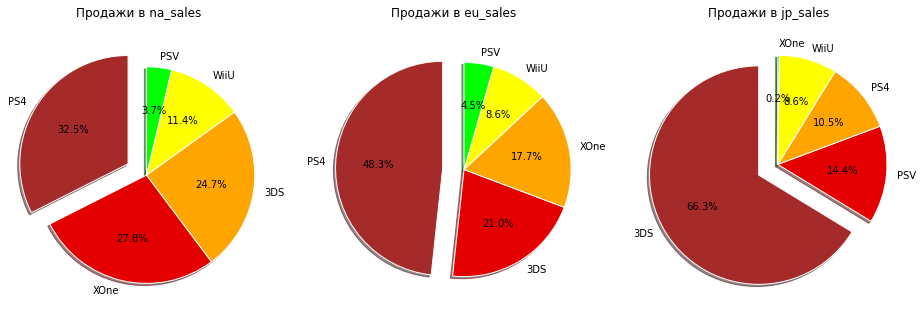

In [91]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

#Задаём переменные 

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.2, 0, 0, 0, 0)

#Задаём набор цветов

colors = ['#A52A2A', '#E50000', '#FFA500', '#FFFF00', '#00FF00']

#Цикл для вывода диаграмм распределения жанров 

for i in [0,1,2]:
    labels = top_5platform_dict[region[i]].index
    sizes = top_5platform_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors) 
    ax.axis('equal')  
plt.show()

Топ - 5 платформ в США и Европе очень похож. 1 мето у платформы PS4, причем если в США доля от всех продаж 32,5%, то в Европе практически половина продаж приходится на эту платформу (48.3%). Платформы XOne и 3DS в зависимости от региона занимают 2 и 3 место. 4 и 5 места у платформ WiiU и PSV соответственно с примерно одинаковыми долями для каждого рынка.
Топ5 платформ в Японии заметно отличается. Тут 1 место 2/3 (66,3%) продаж принадлежит платформе 3DS. Платформы PSV, PS4 и WiiU составляют 14.4%, 10.5% и 8.6% соответственно. При выходе на Японский рынок стоит учитывать его особенности.Портативная игровая система 3DS производства Nintendo невероятно популярна за счет своей доступности в регионе создания.

* Самые популярные жанры (топ-5).

In [92]:
df_na_genre = df_actual_years.groupby(['genre']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print(  )
print('Топ - 5 жанров  Америки ')
display(df_na_genre)


Топ - 5 жанров  Америки 


,genre,na_sales
0,Action,87.24
8,Shooter,73.96
7,Role-Playing,42.44
10,Sports,39.68
4,Platform,26.94


In [93]:
df_eu_genre = df_actual_years.groupby(['genre']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print(  )
print('Топ - 5 жанров Европы')
display(df_eu_genre)


Топ - 5 жанров Европы


,genre,eu_sales
0,Action,79.05
8,Shooter,60.53
10,Sports,39.23
7,Role-Playing,32.35
4,Platform,22.06


In [94]:
df_jp_genre = df_actual_years.groupby(['genre']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print(  )
print('Топ - 5 жанров Японии')
display(df_jp_genre)


Топ - 5 жанров Японии


,genre,jp_sales
7,Role-Playing,54.19
0,Action,36.54
4,Platform,10.71
3,Misc,10.70
9,Simulation,10.64


In [95]:
top5genre_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5genre_dict[region] = df_actual_years.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
top5genre_dict

{'na_sales': genre
 Action          87.24
 Shooter         73.96
 Role-Playing    42.44
 Sports          39.68
 Platform        26.94
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action          79.05
 Shooter         60.53
 Sports          39.23
 Role-Playing    32.35
 Platform        22.06
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    54.19
 Action          36.54
 Platform        10.71
 Misc            10.70
 Simulation      10.64
 Name: jp_sales, dtype: float64}

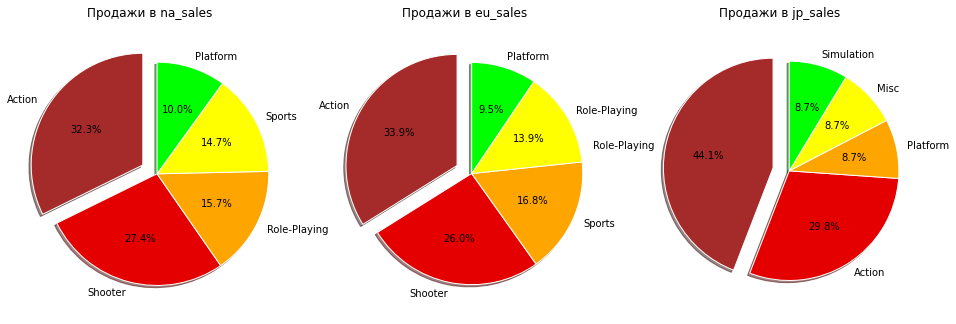

In [96]:
# Самые популярные жанры (топ-5)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

# Задаём переменные 

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

# Задаём набор цветов

colors = ['#A52A2A', '#E50000', '#FFA500', '#FFFF00', '#00FF00']

#Цикл для вывода диаграмм распределения жанров 

for i in [0,1,2]:
    labels = top5genre_dict[region[i]].index
    sizes = top5genre_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors) 
    ax.axis('equal')  

plt.show()

Топ - 5 жанров в США и Европе словпадает 1 мето (32-34% всех продаж) и 2 место (26-27% всех продаж) у жанров Action и Shooter соответственно. Role-Playing и Sports с примерно равным соотношением долей продаж (14-17%), в зависимости от региона жанры занимают 3 или 4 место. На 5 месте жанр Platform, около 10% от продаж.
Топ - 5 жанров в Японии заметно отличается. Тут 1 место и 44.1% продаж принадлежат жанру Role-Playing. Жанр Action занимает 2 место и 29.8% продаж. Жанры Platform, Misc и Simulation по 8.7% от всех продаж. При выходе на Японский рынок стоит учитывать его особенности.

* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [97]:
df_rating = (df_years
          .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],aggfunc='sum')
          )
df_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,141.73,36.68,170.17
E10+,78.00,11.23,117.72
EC,0.00,0.00,0.42
M,250.26,26.14,308.45
RP,0.03,0.00,0.00
T,83.16,33.39,109.31
unknown,116.61,138.21,123.69


E - everyone - для всех

E10+ (Everyone 10+) — для всех старше 10 лет

EC (Early Childhood) — для детей младшего возраста

M (Mature 17+) — от 17 лет

RP (Rating pending) — рейтинг ожидается

T (Teen) — для подростков 13-19 лет

unknown - обработанные ранее данные rating, скорее всего эти игры не получили оценок, поскольку могли быть выпущены до того как появилась система ESRB или просто еще не успели их оценить.

In [98]:
df_years.groupby(['rating']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)

,rating,na_sales
3,M,308.45
0,E,170.17
6,unknown,123.69
1,E10+,117.72
5,T,109.31


In [99]:
df_years.groupby(['rating']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)

,rating,eu_sales
3,M,250.26
0,E,141.73
6,unknown,116.61
5,T,83.16
1,E10+,78.00


In [100]:
df_years.groupby(['rating']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)

,rating,jp_sales
6,unknown,138.21
0,E,36.68
5,T,33.39
3,M,26.14
1,E10+,11.23


Можно сказать, что чем шире возрастные рамки, тем больше продаж. В США и Европе больше покупок совершается в играх 17+ и для всех, тогда как в Японии кроме общего "Для всех" лидирует более младшая группа 13-19 лет. 
Довольно не мало занимает 	unknown - без оценки, особенно заметно в Японии, первое место.

В Америке и Европе очень схожая востребованность пользователя:

Топ - 5 платформы PS4, XOne, 3DS, WiiU и PSV с небольшой разницей в распределении продаж.
Самые популярные жанры - Action, Shooter, Sports, Role-Playing и Platform.
Большая доля продаж приходится на рейтинг M (Mature 17+) — от 17 лет, далее по популярности рейтинг E - everyone - для всех. Затем идут в примерно равных долях E10+ (Everyone 10+) — для всех старше 10 лет и T (Teen) — для подростков 13-19 лет

Востребованность пользователя в Японии заметно отличается:

Лидирует платформа: 66,3% продаж принадлежит платформе 3DS. Платформы PSV, PS4 и WiiU составляют 14.4%, 10.5% и 8.6% соответственно
1 место и 44% продаж принадлежат жанру Role-Playing. Жанр Action занимает 2 место и 30% продаж. Жанры Platform, Misc и Simulation по 8.7% от всех продаж.

В примерно равной популярности рейтинги E - everyone - для всех и T (Teen) — для подростков 13-19 лет. На 3 месте M (Mature 17+) — от 17 лет. При выходе на Японский рынок стоит учитывать его особенности. Так же отметим, что в рейтинг не попало большое кол-во оценок, которое занимает высокие показатели.

## Проверим гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза №1

In [101]:
# Сформируем данные для проверки гипотезы

xone = df_years.query(' platform == "XOne" ')['user_score'].dropna().to_list()
pc = df_years.query(' platform == "PC" ')['user_score'].dropna().to_list()

# Рассчитаем средние значения

xone_mean = df_years.query(' platform == "XOne" ')['user_score'].mean()
pc_mean = df_years.query(' platform == "PC" ')['user_score'].mean()

print('Средний пользовательский рейтинг Xbox One: {:.3}\n'
     'Средний пользовательский рейтинг PC: {:.2}'.format(xone_mean, pc_mean))

Средний пользовательский рейтинг Xbox One: 6.52
Средний пользовательский рейтинг PC: 6.5


In [102]:
# Рассчитаем дисперсии

print('Дисперсия XOne =', np.var(xone))    
print('Дисперсия PC =',  np.var(pc))

Дисперсия XOne = 1.8965188383045526
Дисперсия PC = 2.5878388099608483


Сформулируем гипотезы:

H0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: средние пользовательские рейтинги платформ Xbox One и PC различаются

Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются примерно на 27%. Критический уровень значимости 0.01. Пусть вероятность правильности вывода будет 99% и больше

In [103]:
alpha = .01

results = st.ttest_ind(
    xone, 
    pc,
    nan_policy='omit', 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


Не удалось отвергнуть гипотезу о равенстве средних пользовательских рейтингов у платформ Xbox One и PC , а значит средние пользовательские рейтинги с большой вероятность равны.
Как мы выяснили ранее, средний пользовательский рейтинг для PC 6.5, а для Xbox One 6.52, что подтверждает нашу проверку.

* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Гипотеза №2.

In [104]:
# Сформируем данные для проверки гипотезы

action = df_years.query('genre == "Action"')['user_score'].dropna().to_list()
sports = df_years.query('genre == "Sports"')['user_score'].dropna().to_list()

# Рассчитаем средние значения

action_mean = df_years.query('genre == "Action"')['user_score'].mean()
sports_mean = df_years.query('genre == "Sports"')['user_score'].mean()

print('Средний пользовательский рейтинг Action: {:.3}\n'
     'Средний пользовательский рейтинг Sports: {:.2}'.format(action_mean, sports_mean))

Средний пользовательский рейтинг Action: 6.78
Средний пользовательский рейтинг Sports: 5.7


In [105]:
# Рассчитаем дисперсии

print('Дисперсия XOne =', np.var(action))    
print('Дисперсия PC =',  np.var(sports))

Дисперсия XOne = 1.8091482798664535
Дисперсия PC = 2.87079202194461


Сформулируем гипотезы:

H0: cредние пользовательские рейтинги жанров Action и Sports одинаковые

H1: средние пользовательские рейтинги жанров Action и Sports разные

Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются примерно на 34%. Критический уровень значимости 0.01. Пусть вероятность правильности вывода будет 99% и больше.

In [106]:
alpha = .01

results = st.ttest_ind(
    action, 
    sports, 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.285648549432565e-19
Отвергаем нулевую гипотезу


Отвергаем гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports, а значит средние пользовательские рейтинги с большой вероятность отличаются.
Так как гипотеза двухсторонняя, то сама проверка не даёт нам понять в какую именно сторону оно отличается.
Но как мы уже выяснили ранее: средний пользовательский рейтинг жанра Action 6.78, а для Sports 5.7.

## Общий вывод


Результаты исследования


В ходе исследования рынка компьютерных игр мы обработали массивов данных:

*  заменили названия столбцов
*  преобразовали типы данных в нужные
*  обработали пропуски
*  посчитали суммарные продажи во всех регионах в новый столбец

На этапе исследования данных нам удалось выяснить, что:

*  актуальный период, данные которого помогут построить прогноз на 2017 - это 2011 - 2016 годы
*  самые перспективные платформы: PS4, XOne и WiiU
*  оценки критиков и пользователей не имеют выраженного влияния на объемы продаж, но оценки влияют друг на друга
*  При анализе графиков медианного и среднего кол-ва продаж по регионам, удалось рассмотреть в другом контексте жанры. Выявлены иные лидеры продаж по жанрам, которые стабильно приносили наибольшую прибыль - это Shooter, Platform, Racing, Sports.

Выявлено, что пользователи в Америке и Европе схожи, но заметно отличаются от Японии:

*  В Америке и Европе самые популярные платформы - PS4, XOne, 3DS. И игры с жанрами - Action, Shooter.
*  Большая доля продаж приходится на рейтинг M (Mature 17+) — от 17 лет, далее по популярности рейтинг E - everyone - для всех. А так же есть неучтенные отценки unknown, которые занимают немалую долю в данных.
*  В Японии свои особые предпочтения в плане видеоигр, максимально популярны ролевые видеоигры, а платформа - 3DS.

В результате проверок гипотез, выявлено, что:

*  Cредние пользовательские рейтинги платформ Xbox One и PC не различаются
*  Cредние пользовательские рейтинги жанров Action и Sports различаются

Рекомендации

Целью исследования было веявление определяющих успешность игры закономерностей, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на предстоящий год.

Можно дать следующие рекомендации для планирования рекламных кампаний:

*  ставку лучше делать на игры для приставок/консолей.
*  важно учитывать региональные предпочтения к платформам и жанрам, при выходе на новый рынок.
*  знать, что чем шире возрастной рейтинг, тем больше продаж.